# Aprendizaje supervisado

En el caso de estudio siguiente se plantea construir un modelo clasificador orientado a realizar la clasificación de la diferentes especies de flores iris. El dataset a partir del cual se efectuará el modelado es `iris.csv`

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Exploratory Data Analysis

In [5]:
df=pd.read_csv('datasets/Iris.csv', sep=',')
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
#Eliminacion de columnas innecesarias
df.drop(columns='Id', inplace=True)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
#Observamos la columna target
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

#### Observamos que el dataset esta distribuido de forma homogénea en tres grupos de especies: `setosa` - `versicolor` - `virgínica`. Ahora de forma gráfica analizaremos el comportamiento para las demas `features`.

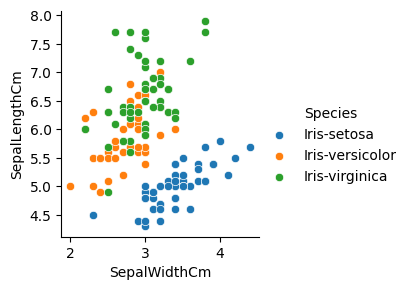

In [8]:
# Diagrama de dispersion para diferentes tamaños de sepalo en cada categoria
sns.FacetGrid(df, hue = 'Species') \
    .map(sns.scatterplot,'SepalWidthCm', 'SepalLengthCm') \
    .add_legend()

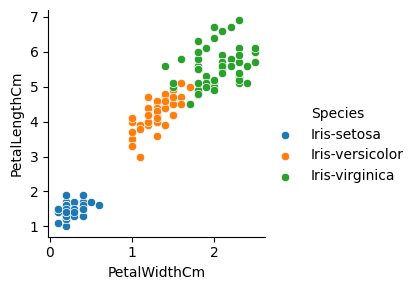

In [9]:
# Diagrama de dispersion para diferentes tamaños de sepalo en cada categoria
sns.FacetGrid(df, hue = 'Species') \
    .map(sns.scatterplot,'PetalWidthCm', 'PetalLengthCm') \
    .add_legend()

<Axes: xlabel='PetalLengthCm', ylabel='Species'>

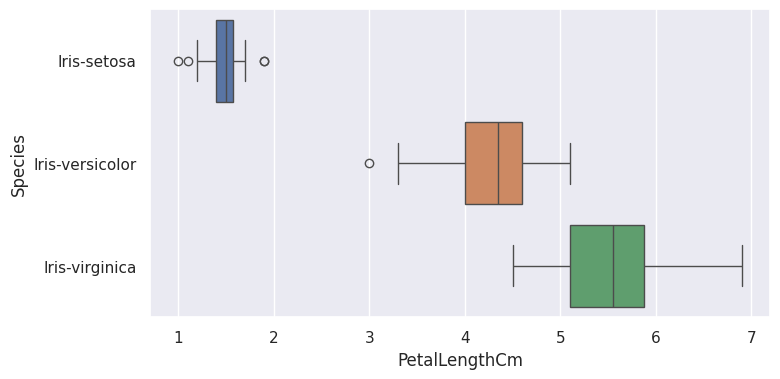

In [10]:
#Ahora con diagramas de cajas y bigotes
sns.set_theme(rc={'figure.figsize':(8,4)})
sns.boxplot(x='PetalLengthCm', y='Species', hue='Species', data=df)

<Axes: xlabel='PetalWidthCm', ylabel='Species'>

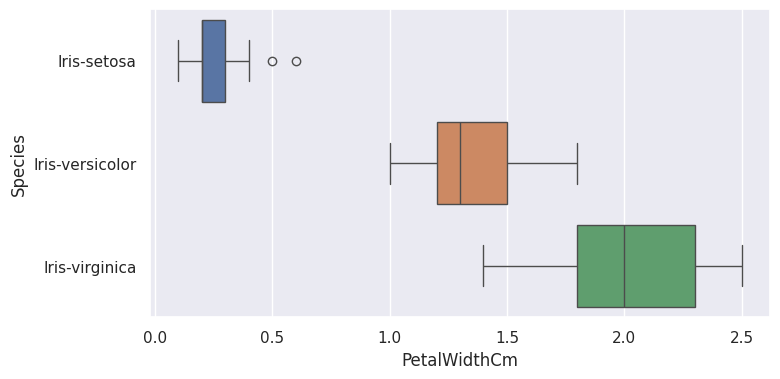

In [11]:
sns.boxplot(x='PetalWidthCm', y='Species', hue='Species', data=df)

<Axes: xlabel='SepalLengthCm', ylabel='Species'>

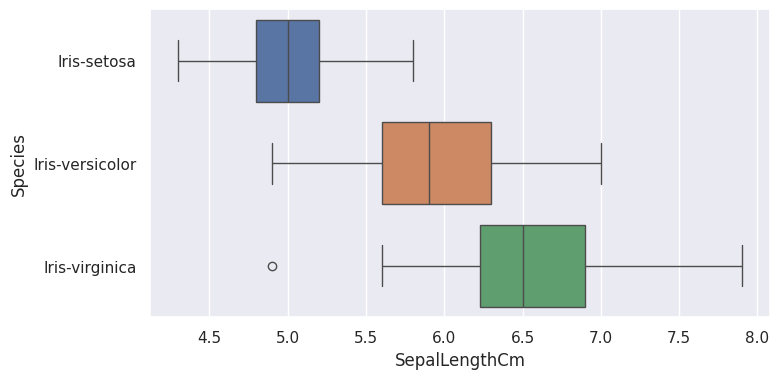

In [12]:
sns.boxplot(x='SepalLengthCm', y='Species', hue='Species', data=df)

<Axes: xlabel='SepalWidthCm', ylabel='Species'>

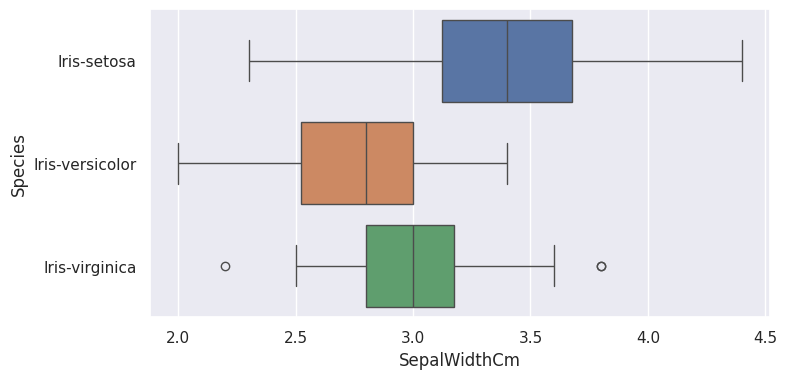

In [13]:
sns.boxplot(x='SepalWidthCm', y='Species', hue='Species', data=df)

In [14]:
#Finalmente analizamos la distribución de los datos para cada feature
df[df['Species']=='Iris-setosa'].describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


In [15]:
df[df['Species']=='Iris-versicolor'].describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


In [16]:
df[df['Species']=='Iris-virginica'].describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


<Axes: xlabel='SepalLengthCm', ylabel='Density'>

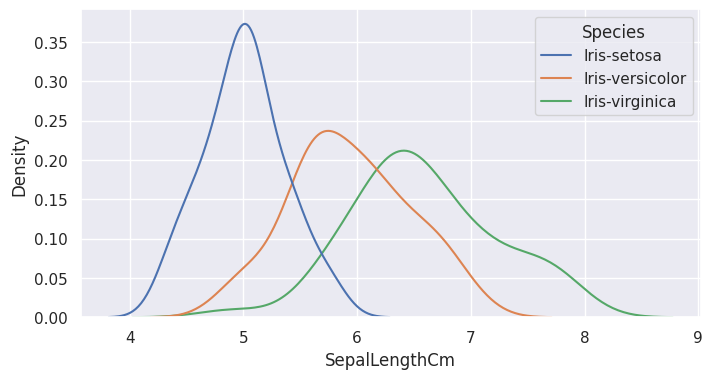

In [17]:
sns.kdeplot(data=df, x="SepalLengthCm", hue='Species')

<Axes: xlabel='SepalWidthCm', ylabel='Density'>

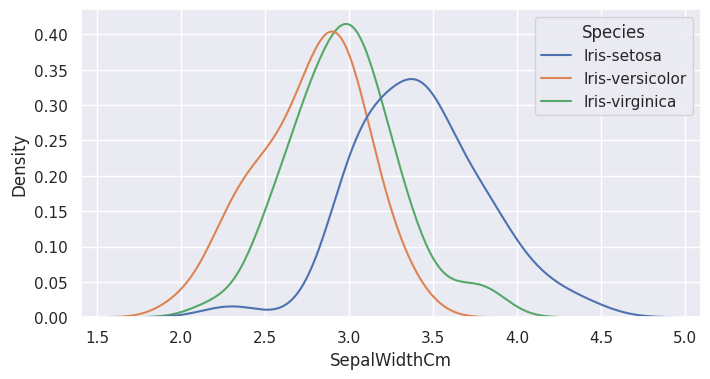

In [18]:
sns.kdeplot(data=df, x="SepalWidthCm", hue='Species')

<Axes: xlabel='PetalLengthCm', ylabel='Density'>

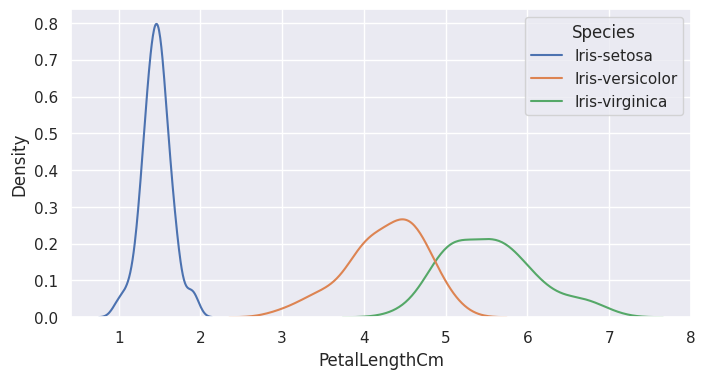

In [19]:
sns.kdeplot(data=df, x="PetalLengthCm", hue='Species')

<Axes: xlabel='PetalWidthCm', ylabel='Density'>

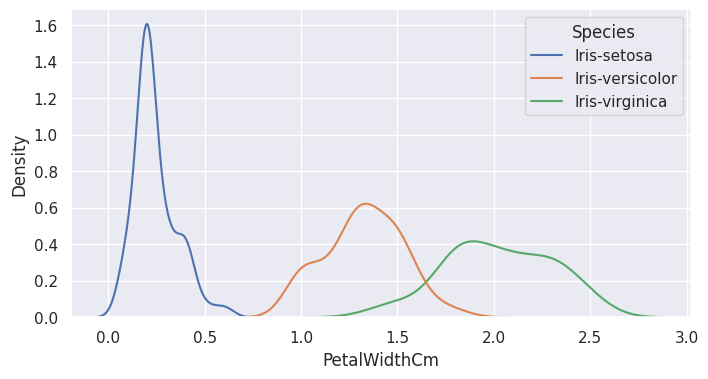

In [20]:
sns.kdeplot(data=df, x="PetalWidthCm", hue='Species')

#### Model

In [21]:
#Verificamos algunas caracteristas adicionales del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<Axes: >

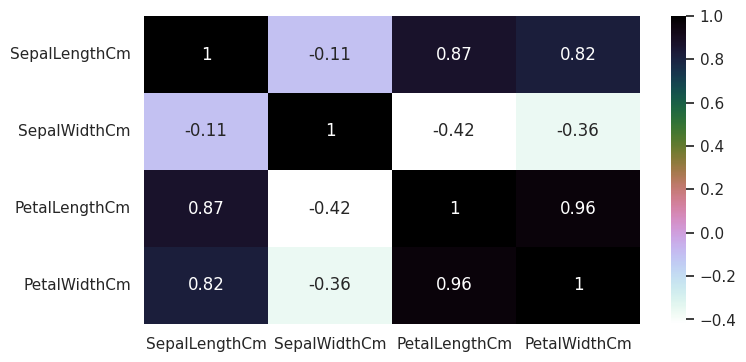

In [22]:
#Matriz de correlación
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='cubehelix_r')

1. `SepalLengthCm` y `SepalWidthCm` NO se encuentran correlacionadas entre sí
2. `PetalLengthCm` y `PetalWidthCm` SI están altamente correlacionados
3. Entrenar un modelo con muchas **features** disminuye la exactitud (`accuracy`)
4. Es necesario elegir para el entrenamiento sólo aquellas **features** relevantes

## Entrenamos el modelo

In [70]:
#Debido a que solo disponemos de un único dataset, haremos un particionado para train & test
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.3, shuffle=True)

In [56]:
print('{0} registros para entrenamiento'.format(train.shape[0]))
print('{0} registros para test'.format(test.shape[0]))

105 registros para entrenamiento
45 registros para test


In [57]:
train.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
94,5.6,2.7,4.2,1.3,Iris-versicolor
120,6.9,3.2,5.7,2.3,Iris-virginica
84,5.4,3.0,4.5,1.5,Iris-versicolor
69,5.6,2.5,3.9,1.1,Iris-versicolor
79,5.7,2.6,3.5,1.0,Iris-versicolor
123,6.3,2.7,4.9,1.8,Iris-virginica
8,4.4,2.9,1.4,0.2,Iris-setosa
58,6.6,2.9,4.6,1.3,Iris-versicolor
14,5.8,4.0,1.2,0.2,Iris-setosa
44,5.1,3.8,1.9,0.4,Iris-setosa


In [58]:
test.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
74,6.4,2.9,4.3,1.3,Iris-versicolor
91,6.1,3.0,4.6,1.4,Iris-versicolor
122,7.7,2.8,6.7,2.0,Iris-virginica
9,4.9,3.1,1.5,0.1,Iris-setosa
131,7.9,3.8,6.4,2.0,Iris-virginica
132,6.4,2.8,5.6,2.2,Iris-virginica
53,5.5,2.3,4.0,1.3,Iris-versicolor
5,5.4,3.9,1.7,0.4,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
60,5.0,2.0,3.5,1.0,Iris-versicolor


In [71]:
#Considerando solo PetalLengthCm y PetalWidthCm para la construcción del modelo a fin de tener un accuracy óptimo
train_x=train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
train_y=train.Species

In [72]:
test_x=test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
test_y=test.Species

In [73]:
test_x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
87,6.3,2.3,4.4,1.3
3,4.6,3.1,1.5,0.2
2,4.7,3.2,1.3,0.2
7,5.0,3.4,1.5,0.2
97,6.2,2.9,4.3,1.3
64,5.6,2.9,3.6,1.3
56,6.3,3.3,4.7,1.6
91,6.1,3.0,4.6,1.4
104,6.5,3.0,5.8,2.2
137,6.4,3.1,5.5,1.8


In [38]:
test_y

4          Iris-setosa
102     Iris-virginica
77     Iris-versicolor
109     Iris-virginica
113     Iris-virginica
2          Iris-setosa
110     Iris-virginica
45         Iris-setosa
19         Iris-setosa
126     Iris-virginica
23         Iris-setosa
63     Iris-versicolor
59     Iris-versicolor
117     Iris-virginica
22         Iris-setosa
15         Iris-setosa
112     Iris-virginica
145     Iris-virginica
9          Iris-setosa
49         Iris-setosa
35         Iris-setosa
53     Iris-versicolor
69     Iris-versicolor
81     Iris-versicolor
133     Iris-virginica
1          Iris-setosa
43         Iris-setosa
25         Iris-setosa
82     Iris-versicolor
48         Iris-setosa
90     Iris-versicolor
103     Iris-virginica
115     Iris-virginica
31         Iris-setosa
147     Iris-virginica
86     Iris-versicolor
70     Iris-versicolor
72     Iris-versicolor
114     Iris-virginica
28         Iris-setosa
64     Iris-versicolor
34         Iris-setosa
3          Iris-setosa
75     Iris

#### Algoritmos de clasificación

In [69]:
from sklearn.linear_model import LogisticRegression # Regresion logistica
from sklearn.neighbors import KNeighborsClassifier # K vecinos más cercanos
from sklearn import svm # Support Vector Machine
from sklearn.tree import DecisionTreeClassifier # Arbol de decision

from sklearn import metrics # Para evaluar metricas

`Support Vector Machine (SVM)`

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2024/08/1403824.webp)

In [74]:
model = svm.SVC()
model.fit(train_x, train_y)
prediction = model.predict(test_x)

In [40]:
prediction

array(['Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica'], dtype=object)

In [75]:
print('The accuracy of the SVM is: ', metrics.accuracy_score(prediction, test_y))

The accuracy of the SVM is:  0.9555555555555556


`Logistic Regression`

![](https://miro.medium.com/v2/resize:fit:499/0*ENkZ5v28CDzuaoYU.png)

In [76]:
model = LogisticRegression()
model.fit(train_x, train_y)
prediction = model.predict(test_x)
print('The accuracy of Logistic Regression is: ', metrics.accuracy_score(prediction, test_y))

The accuracy of Logistic Regression is:  0.9555555555555556


`Decision Tree`

![](https://miro.medium.com/v2/resize:fit:1400/0*EdaEBTFFLFnhOUrF.png)

In [77]:
model = DecisionTreeClassifier()
model.fit(train_x, train_y)
prediction = model.predict(test_x)
print('The accuracy of Decision Tree is: ', metrics.accuracy_score(prediction, test_y))

The accuracy of Decision Tree is:  0.9555555555555556


`K-Nearest Neighbors`

![](https://d3i71xaburhd42.cloudfront.net/8a4c6b320f8adcd91d54a8020efadc936433964c/2-Figure2-1.png)

In [78]:
model = KNeighborsClassifier(n_neighbors=3) 
model.fit(train_x, train_y)
prediction = model.predict(test_x)
print('The accuracy of KNN is: ', metrics.accuracy_score(prediction, test_y))

The accuracy of KNN is:  0.9777777777777777
